In [1]:
import pickle
from collections import Counter
from altProts_in_communities.network_assembly import *
from altProts_in_communities.utils import *

In [2]:
ev1 = pickle.load(open('ev1.pkl', 'rb'))
G_o = pickle.load(open('G_o.pkl', 'rb'))
BG = pickle.load(open('biogrid_networkx.pkl', 'rb'))

In [3]:
detection_summary = pickle.load(open('detection_summary.pkl', 'rb'))
detected_alts = set([x[0] for x in detection_summary if x[-1]])
len(detected_alts)

278

In [4]:
alt_pseudos = set([x['altProt accession'] for x in ev1 if 'pseudo' in x['gene biotype']])
len(alt_pseudos)

117

In [5]:
# http://www.pseudogene.org/psicube/data/gencode.v10.pgene.parents.txt
pseudo_parent_dict = pickle.load(open('pseudo_parent_dict.pkl', 'rb'))

In [6]:
pseudo_parent_refProt_acc = dict([
    ('AK2', 'ENSP00000346921.6'), 
    ('ANXA2', 'ENSP00000346032.3'), 
    ('ASS1', 'ENSP00000253004.6'), 
    ('CCT6A', 'ENSP00000275603.4'), 
    ('CCT8', 'ENSP00000286788.4'), 
    ('DNAJA1', 'ENSP00000369127.3'),
    ('GAPDH', 'ENSP00000229239.5'),
    ('GLUL', 'ENSP00000307900.5'),
    ('HMGB3', 'ENSP00000359393.3'),
    ('HNRNPA1', 'ENSP00000341826.6'),
    ('HSP90AA1', 'ENSP00000335153.7'),
    ('HSPD1', 'ENSP00000340019.2'),
    ('RPS2', 'ENSP00000341885.4'),
    ('ST13', 'ENSP00000216218.3')
])

In [7]:
ensmbl_gene_prot = {}
with open('mart_export.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for n,row in enumerate(reader):
        if n==0:
            keys = row
            continue
        line = dict(zip(keys, row))
        ensmbl_gene_prot[line['Gene name']] = line['Protein stable ID']

In [8]:
psicube_dict = {}
with open('gencode.v10.pgene.parents.txt', 'r') as f:
    for n,l in enumerate(f):
        ls = l.strip().split('\t')
        if n==0:
            keys = ls
            continue
        line = dict(zip(keys, ls))
        if 'Parent name' in line:
            psicube_dict[line['Name']] = line['Parent name']
        elif 'Parent gene' in line:
            psicube_dict[line['Name']] = line['Parent gene']

In [9]:
pseudo_parent_prot_pairs = {}
missing_parent_genes = []
for alt_acc in alt_pseudos:
    pseudogene = prot_gene_dict[alt_acc]
    pseudo_parent_prot_pairs[(alt_acc, pseudogene)] = {}
    
    if pseudogene in pseudo_parent_dict:
        pseudo_parent_prot_pairs[(alt_acc, pseudogene)].update(pseudo_parent_dict[pseudogene])
        
    elif pseudogene in psicube_dict:
        parent = psicube_dict[pseudogene]
        if parent not in pseudo_parent_refProt_acc:
            print("pseudo_parent_dict['{}'] = 'parent':'{}', 'prot_acc':'', 'alt_acc':'{}'".format(pseudogene, parent, alt_acc))
            continue
        pseudo_parent_prot_pairs[(alt_acc, pseudogene)] = {'parent': psicube_dict[pseudogene], 'prot_acc':pseudo_parent_refProt_acc[parent], 'alt_acc':alt_acc}

    else:
        missing_parent_genes.append(pseudogene)
        print("No parent found: {}|{}".format(pseudogene, alt_acc))

No parent found: LOC646938|IP_734554
No parent found: SULT1C2P2|IP_638493
No parent found: AC008758.4|IP_691643
No parent found: AL096701.1|IP_651189
No parent found: EEF1GP5|IP_558531
No parent found: KRT89P|IP_762764
No parent found: HLA-V|IP_597081
No parent found: AC010677.1|IP_584259
No parent found: AL391419.1|IP_556791
No parent found: KRT87P|IP_3404123
No parent found: AC008481.1|IP_691723
No parent found: AC008567.1|IP_689722
No parent found: AL355994.2|IP_671823
No parent found: FMO5|IP_669446
No parent found: AC025470.1|IP_603113
No parent found: AL021407.2|IP_595437
No parent found: AC110994.1|IP_622877
No parent found: AL139100.1|IP_592636
pseudo_parent_dict['BRD7P6'] = 'parent':'BRD7', 'prot_acc':'', 'alt_acc':'IP_638355'
No parent found: TUBB8P11|IP_673226
No parent found: AL355365.1|IP_589156
No parent found: KRT89P|IP_3435724
No parent found: HSPA8P7|IP_557401
No parent found: KLRA1P|IP_763043
No parent found: AC010395.2|IP_602155
No parent found: AC008481.2|IP_691726


In [10]:
#http://scikit-bio.org/docs/0.4.2/generated/skbio.alignment.global_pairwise_align_protein.html#skbio.alignment.global_pairwise_align_protein
from skbio.alignment import global_pairwise_align_protein
from skbio.sequence import Protein

/home/sleblanc/anaconda3/lib/python3.7/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


In [11]:
blosum62 = {
    ('W', 'F'): 1, ('L', 'R'): -2, ('S', 'P'): -1, ('V', 'T'): 0,
    ('Q', 'Q'): 5, ('N', 'A'): -2, ('Z', 'Y'): -2, ('W', 'R'): -3,
    ('Q', 'A'): -1, ('S', 'D'): 0, ('H', 'H'): 8, ('S', 'H'): -1,
    ('H', 'D'): -1, ('L', 'N'): -3, ('W', 'A'): -3, ('Y', 'M'): -1,
    ('G', 'R'): -2, ('Y', 'I'): -1, ('Y', 'E'): -2, ('B', 'Y'): -3,
    ('Y', 'A'): -2, ('V', 'D'): -3, ('B', 'S'): 0, ('Y', 'Y'): 7,
    ('G', 'N'): 0, ('E', 'C'): -4, ('Y', 'Q'): -1, ('Z', 'Z'): 4,
    ('V', 'A'): 0, ('C', 'C'): 9, ('M', 'R'): -1, ('V', 'E'): -2,
    ('T', 'N'): 0, ('P', 'P'): 7, ('V', 'I'): 3, ('V', 'S'): -2,
    ('Z', 'P'): -1, ('V', 'M'): 1, ('T', 'F'): -2, ('V', 'Q'): -2,
    ('K', 'K'): 5, ('P', 'D'): -1, ('I', 'H'): -3, ('I', 'D'): -3,
    ('T', 'R'): -1, ('P', 'L'): -3, ('K', 'G'): -2, ('M', 'N'): -2,
    ('P', 'H'): -2, ('F', 'Q'): -3, ('Z', 'G'): -2, ('X', 'L'): -1,
    ('T', 'M'): -1, ('Z', 'C'): -3, ('X', 'H'): -1, ('D', 'R'): -2,
    ('B', 'W'): -4, ('X', 'D'): -1, ('Z', 'K'): 1, ('F', 'A'): -2,
    ('Z', 'W'): -3, ('F', 'E'): -3, ('D', 'N'): 1, ('B', 'K'): 0,
    ('X', 'X'): -1, ('F', 'I'): 0, ('B', 'G'): -1, ('X', 'T'): 0,
    ('F', 'M'): 0, ('B', 'C'): -3, ('Z', 'I'): -3, ('Z', 'V'): -2,
    ('S', 'S'): 4, ('L', 'Q'): -2, ('W', 'E'): -3, ('Q', 'R'): 1,
    ('N', 'N'): 6, ('W', 'M'): -1, ('Q', 'C'): -3, ('W', 'I'): -3,
    ('S', 'C'): -1, ('L', 'A'): -1, ('S', 'G'): 0, ('L', 'E'): -3,
    ('W', 'Q'): -2, ('H', 'G'): -2, ('S', 'K'): 0, ('Q', 'N'): 0,
    ('N', 'R'): 0, ('H', 'C'): -3, ('Y', 'N'): -2, ('G', 'Q'): -2,
    ('Y', 'F'): 3, ('C', 'A'): 0, ('V', 'L'): 1, ('G', 'E'): -2,
    ('G', 'A'): 0, ('K', 'R'): 2, ('E', 'D'): 2, ('Y', 'R'): -2,
    ('M', 'Q'): 0, ('T', 'I'): -1, ('C', 'D'): -3, ('V', 'F'): -1,
    ('T', 'A'): 0, ('T', 'P'): -1, ('B', 'P'): -2, ('T', 'E'): -1,
    ('V', 'N'): -3, ('P', 'G'): -2, ('M', 'A'): -1, ('K', 'H'): -1,
    ('V', 'R'): -3, ('P', 'C'): -3, ('M', 'E'): -2, ('K', 'L'): -2,
    ('V', 'V'): 4, ('M', 'I'): 1, ('T', 'Q'): -1, ('I', 'G'): -4,
    ('P', 'K'): -1, ('M', 'M'): 5, ('K', 'D'): -1, ('I', 'C'): -1,
    ('Z', 'D'): 1, ('F', 'R'): -3, ('X', 'K'): -1, ('Q', 'D'): 0,
    ('X', 'G'): -1, ('Z', 'L'): -3, ('X', 'C'): -2, ('Z', 'H'): 0,
    ('B', 'L'): -4, ('B', 'H'): 0, ('F', 'F'): 6, ('X', 'W'): -2,
    ('B', 'D'): 4, ('D', 'A'): -2, ('S', 'L'): -2, ('X', 'S'): 0,
    ('F', 'N'): -3, ('S', 'R'): -1, ('W', 'D'): -4, ('V', 'Y'): -1,
    ('W', 'L'): -2, ('H', 'R'): 0, ('W', 'H'): -2, ('H', 'N'): 1,
    ('W', 'T'): -2, ('T', 'T'): 5, ('S', 'F'): -2, ('W', 'P'): -4,
    ('L', 'D'): -4, ('B', 'I'): -3, ('L', 'H'): -3, ('S', 'N'): 1,
    ('B', 'T'): -1, ('L', 'L'): 4, ('Y', 'K'): -2, ('E', 'Q'): 2,
    ('Y', 'G'): -3, ('Z', 'S'): 0, ('Y', 'C'): -2, ('G', 'D'): -1,
    ('B', 'V'): -3, ('E', 'A'): -1, ('Y', 'W'): 2, ('E', 'E'): 5,
    ('Y', 'S'): -2, ('C', 'N'): -3, ('V', 'C'): -1, ('T', 'H'): -2,
    ('P', 'R'): -2, ('V', 'G'): -3, ('T', 'L'): -1, ('V', 'K'): -2,
    ('K', 'Q'): 1, ('R', 'A'): -1, ('I', 'R'): -3, ('T', 'D'): -1,
    ('P', 'F'): -4, ('I', 'N'): -3, ('K', 'I'): -3, ('M', 'D'): -3,
    ('V', 'W'): -3, ('W', 'W'): 11, ('M', 'H'): -2, ('P', 'N'): -2,
    ('K', 'A'): -1, ('M', 'L'): 2, ('K', 'E'): 1, ('Z', 'E'): 4,
    ('X', 'N'): -1, ('Z', 'A'): -1, ('Z', 'M'): -1, ('X', 'F'): -1,
    ('K', 'C'): -3, ('B', 'Q'): 0, ('X', 'B'): -1, ('B', 'M'): -3,
    ('F', 'C'): -2, ('Z', 'Q'): 3, ('X', 'Z'): -1, ('F', 'G'): -3,
    ('B', 'E'): 1, ('X', 'V'): -1, ('F', 'K'): -3, ('B', 'A'): -2,
    ('X', 'R'): -1, ('D', 'D'): 6, ('W', 'G'): -2, ('Z', 'F'): -3,
    ('S', 'Q'): 0, ('W', 'C'): -2, ('W', 'K'): -3, ('H', 'Q'): 0,
    ('L', 'C'): -1, ('W', 'N'): -4, ('S', 'A'): 1, ('L', 'G'): -4,
    ('W', 'S'): -3, ('S', 'E'): 0, ('H', 'E'): 0, ('S', 'I'): -2,
    ('H', 'A'): -2, ('S', 'M'): -1, ('Y', 'L'): -1, ('Y', 'H'): 2,
    ('Y', 'D'): -3, ('E', 'R'): 0, ('X', 'P'): -2, ('G', 'G'): 6,
    ('G', 'C'): -3, ('E', 'N'): 0, ('Y', 'T'): -2, ('Y', 'P'): -3,
    ('T', 'K'): -1, ('A', 'A'): 4, ('P', 'Q'): -1, ('T', 'C'): -1,
    ('V', 'H'): -3, ('T', 'G'): -2, ('I', 'Q'): -3, ('Z', 'T'): -1,
    ('C', 'R'): -3, ('V', 'P'): -2, ('P', 'E'): -1, ('M', 'C'): -1,
    ('K', 'N'): 0, ('I', 'I'): 4, ('P', 'A'): -1, ('M', 'G'): -3,
    ('T', 'S'): 1, ('I', 'E'): -3, ('P', 'M'): -2, ('M', 'K'): -1,
    ('I', 'A'): -1, ('P', 'I'): -3, ('R', 'R'): 5, ('X', 'M'): -1,
    ('L', 'I'): 2, ('X', 'I'): -1, ('Z', 'B'): 1, ('X', 'E'): -1,
    ('Z', 'N'): 0, ('X', 'A'): 0, ('B', 'R'): -1, ('B', 'N'): 3,
    ('F', 'D'): -3, ('X', 'Y'): -1, ('Z', 'R'): 0, ('F', 'H'): -1,
    ('B', 'F'): -3, ('F', 'L'): 0, ('X', 'Q'): -1, ('B', 'B'): 4
}

BLOSUM62 = {}
for aas, s in blosum62.items():
    aa1, aa2 = aas
    if aa1 not in BLOSUM62:
        BLOSUM62[aa1] = {}
    if aa2 not in BLOSUM62:
        BLOSUM62[aa2] = {}
    BLOSUM62[aa1].update({aa2:s})
    BLOSUM62[aa2].update({aa1:s})

In [12]:
fasta_fields = ['OS', 'GN', 'TA', 'PA']
def parse_fasta_header(h):
    h = h.split()
    acc = h[0].split('|')[0]
    res = {}
    for f in h[1:]:
        for field in fasta_fields:
            if f[:2] == field:
                res[field] = f[3:]
    if 'GN' not in res:
        res['GN'] = 'unknown'
    if 'PA' in res  and ',' in res['PA']:
        res['PA'] = res['PA'].split(',')
    return res 

In [13]:
prot_seq_dict = {}
for rec in SeqIO.parse('human-openprot-r1_6-refprots+altprots+isoforms-+uniprot2019_03_01.fasta', 'fasta'):
    tt_acc = rec.name.split('|')[0]
    prot_seq_dict[tt_acc] = rec.seq
    if '.' in tt_acc:
        prot_seq_dict[tt_acc.split('.')[0]] = rec.seq
    header = parse_fasta_header(rec.description)
    
    if 'PA' in header:
        for pa in header['PA']:
            prot_seq_dict[pa.split('.')[0]] = rec.seq

In [14]:
G_paths = G_o.copy()
sps, alignments = [], []
missing_parent_genes = []
for pseudo_alt, parent_prot in pseudo_parent_prot_pairs.items():
    alt_acc, pseudogene = pseudo_alt
    alt_acc_gene = '|'.join([pseudogene, alt_acc])
    if 'parent' not in parent_prot:
        missing_parent_genes.append(pseudo_alt)
        print('missing parent gene:', pseudo_alt)
        continue
    parent_gene = parent_prot['parent']
    sp = 0
    seq1 = Protein(altprotseq_dict[alt_acc])
    if parent_prot['prot_acc'].split('.')[0] not in prot_seq_dict:
        print('not in seq dict:', parent_prot['prot_acc'].split('.')[0])
        break
    seq2 = str(prot_seq_dict[parent_prot['prot_acc'].split('.')[0]])
    if seq2:
        seq2 = Protein(seq2)
    else:
        print('No seq from OP:', parent_prot['prot_acc'])
        continue
    
    NW_score = global_pairwise_align_protein(seq1, seq2, gap_open_penalty=10, gap_extend_penalty=0.5, substitution_matrix=BLOSUM62, penalize_terminal_gaps=False)
    pseudo_parent_prot_pairs[pseudo_alt].update({'sortest_path_len':sp, 'NW_score':NW_score[1]})
    
    if parent_gene in G_paths:
        try:
            sp = nx.shortest_path_length(G_paths, alt_acc_gene, parent_gene)
        except:
            print('issue calculating path - ', alt_acc_gene, parent_gene)
            continue
        
    elif parent_gene in G_b:
        for n in G_b.neighbors(parent_gene):
            if n in G_paths:
                G_paths.add_edge(parent_gene, n)
        try:
            sp = nx.shortest_path_length(G_paths, alt_acc_gene, parent_gene)
        except:
            print('{} - {} no path'.format(parent_gene, alt_acc_gene))
        print(parent_gene, 'in BP2', )
        
    elif parent_gene in BG:
        if sum(n in G_paths for n in BG.neighbors(parent_gene)) == 0: continue# no BioGrid 2nd deg neighbors in G_o
        for n in BG.neighbors(parent_gene):
            if n in G_paths:
                G_paths.add_edge(parent_gene, n)
        try:
            sp = nx.shortest_path_length(G_paths, alt_acc_gene, parent_gene)
        except:
            print('{} - {} no path'.format(parent_gene, alt_acc_gene))
        print(parent_gene, 'in BIOGRID', sp)
        
    if sp<1: continue
    pseudo_parent_prot_pairs[pseudo_alt].update({'sortest_path_len':sp, 'NW_score':NW_score[1]})
    sps.append(sp)
    alignments.append(NW_score[1])
    print(alt_acc, pseudogene, parent_gene, sp)

/home/sleblanc/anaconda3/lib/python3.7/site-packages/skbio/alignment/_pairwise.py:599: EfficiencyWarning: You're using skbio's python implementation of Needleman-Wunsch alignment. This is known to be very slow (e.g., thousands of times slower than a native C implementation). We'll be adding a faster version soon (see https://github.com/biocore/scikit-bio/issues/254 to track progress on this).
  "to track progress on this).", EfficiencyWarning)


IP_662403 NPM1P19 NPM1 1
IP_762813 PHBP19 PHB 1
IP_591826 HSPD1P10 HSPD1 1
IP_556050 RAC1P4 RAC2 1
IP_3390265 ANXA2P1 ANXA2 1
IP_737074 EEF1A1P22 EEF1A1 1
missing parent gene: ('IP_734554', 'LOC646938')
IP_761275 GAPDHP44 GAPDH 1
IP_564999 LDHAP4 LDHA 1
UBB in BP2
IP_710742 UBBP4 UBB 6
TUBB4A in BIOGRID 4
IP_557240 TUBB4AP1 TUBB4A 4
IP_762589 EEF1A1P4 EEF1A1 1
IP_603079 SETP21 SET 2
HSP90AA1 in BP2
IP_610386 HSP90AA4P HSP90AA1 2
IP_735797 GAPDHP61 GAPDH 1
IP_758374 EIF4A1P7 EIF4A1 1
IP_775646 RPLP0P2 RPLP0 1
missing parent gene: ('IP_638493', 'SULT1C2P2')
missing parent gene: ('IP_691643', 'AC008758.4')
missing parent gene: ('IP_651189', 'AL096701.1')
IP_572422 TUBBP1 TUBB 3
missing parent gene: ('IP_558531', 'EEF1GP5')
IP_672168 GAPDHP46 GAPDH 1
IP_736336 ASB9P1 ASB9 1
IP_557270 HSPA8P1 HSPA8 7
missing parent gene: ('IP_762764', 'KRT89P')
IP_591881 GAPDHP63 GAPDH 1
IP_571963 AC024451.2 NSFL1C 1
IP_789496 DYNC1I2P1 DYNC1I2 1
IP_578417 RPL7P59 RPL7 7
IP_658154 HSPD1P7 HSPD1 1
HSPA5 in B

count alt-pseugogene pairs: 80


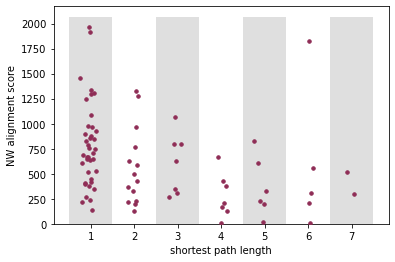

In [15]:
sps_plot = []
for sp in sps:
    sps_plot.append(sp+np.random.normal(0, 0.1))
print('count alt-pseugogene pairs:', len(sps_plot))
fig, ax = plt.subplots()
ax.bar(range(1, 8), [max(alignments)+100,]*7, width=1, color=['#dfdfdf','w'], )
ax.scatter(sps_plot, alignments, s=12, color='#8F2D56', zorder=10)
#ax.set_ylim(0,100)
ax.set_xlabel('shortest path length')
ax.set_xticks(range(1,8))
ax.set_ylabel('NW alignment score')
plt.savefig('bioplex_figures/pseudo_alt_sp.svg')
plt.show()

In [23]:
interpro = pickle.load(open('interpro.pkl', 'rb'))

In [25]:
prent_prots = [p['prot_acc'] for p in pseudo_parent_prot_pairs.values() if 'prot_acc' in p and p['prot_acc']]

In [26]:
# interproscan
import psycopg2
db_prod_conn_str   = "dbname='annotations' host='altprotdb02.ccs.usherbrooke.ca' port='5435' user='saltorf' password='saltorf'"

def execute_query(Q, conn_str):
    conn = psycopg2.connect(conn_str)
    C = conn.cursor()
    C.execute(Q)
    results = C.fetchall()
    conn.commit()
    conn.close()
    return results

Q = "\
SELECT tt.transcript_translation_accession, i.interpro_name, i.interpro_description, i.accession, i.name, i.description \
FROM r_prot_search tt \
INNER JOIN domain_prediction i ON i.protein_seq_id = tt.protein_seq_id \
WHERE tt.openprot_release_id=79 \
AND tt.transcript_translation_accession in ({}); \
".format("'"+"', '".join(list(detected_alts)+prent_prots)+"'")
result = execute_query(Q, db_prod_conn_str)

interpro = {}
for acc, hits in itt.groupby(sorted(result, key=lambda x: x[0]), key=lambda x: x[0]):
    hits = list(hits)
    interpro[acc] = {}
    interpro[acc]['ipr_ids'] = set(x[1] for x in hits if x[1] is not None)
    interpro[acc]['ipr_desc'] = set(x[2] for x in hits if x[1] is not None)
    interpro[acc]['sig_accs'] = [x[3] for x in hits]
    interpro[acc]['sig_desc'] = [x[4] if x[4] is not None else x[2] for x in hits]
    

In [27]:
altpseudo_parent_interpro = []
for alt_pseudogene, parent in pseudo_parent_prot_pairs.items():
    if 'prot_acc' not in parent or not parent['prot_acc']: continue
    alt_acc, pseudogene = alt_pseudogene
    alt_interpro, parent_interpro, alt_interpro_id, alt_interpro_desc, parent_interpro_id, parent_interpro_desc = ['NA']*6
    if alt_acc in interpro:
        alt_interpro_id = '|'.join(interpro[alt_acc]['ipr_ids'])
        alt_interpro_desc = '|'.join(interpro[alt_acc]['ipr_desc'])
        
    if parent['prot_acc'] in interpro:
        parent_interpro_id = '|'.join(interpro[parent['prot_acc']]['ipr_ids'])
        parent_interpro_desc = '|'.join(interpro[parent['prot_acc']]['ipr_desc'])
        
    count_shared_interpro = len(set(alt_interpro_id.split('|')).intersection(set(parent_interpro_id.split('|'))))

    sp = parent['sortest_path_len'] if 'sortest_path_len' in parent and parent['sortest_path_len']>0 else 'no path'
    NW = parent['NW_score']
    altpseudo_parent_interpro.append((alt_acc, pseudogene, parent['parent'], parent['prot_acc'], sp, NW, count_shared_interpro, alt_interpro_desc, parent_interpro_desc, alt_interpro_id, parent_interpro_id))

In [28]:
cols = ('altProt accession', 'pseudogene', 'parent gene', 'parent refProt', 'shortest path length', 'NW alignment score', 
        'count shared interproscan', 'altProt interproscan descriptions', 'refProt interproscan descriptions', 
        'altProt interproscan ids', 'refProt interproscan ids')

with open('bioplex_tables/Table_S4.tsv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerow(cols)
    for l in sorted(altpseudo_parent_interpro, key=lambda x: x[4] if type(x[4])==int else 100):
        writer.writerow(l)

In [29]:
alt_coding = set([x['altProt accession'] for x in ev1 if 'protein_coding' in x['gene biotype']])
len(alt_coding)

118

In [30]:
G_paths = G_o.copy()
alt_coding_shortest_paths = []
processed_pepgrps = []
for alt in alt_coding:
    gene = prot_gene_dict[alt]
    gene_alt = '|'.join([gene, alt])
    if gene in G_paths:
        try:
            alt_coding_shortest_paths.append(
                (gene, gene_alt, nx.shortest_path_length(G_paths, gene_alt, gene))
            )
        except:
            print('{} - {} no path'.format(gene, alt))
    
    elif gene in G_b:
        for n in G_b.neighbors(gene):
            if n in G_paths:
                G_paths.add_edge(gene, n)
        try:
            sp = nx.shortest_path_length(G_paths, gene_alt, gene)
            alt_coding_shortest_paths.append(
                (gene, gene_alt, nx.shortest_path_length(G_paths, gene_alt, gene))
            )
        except:
            sp = '{} - {} no path'.format(gene, alt)
        print(gene, 'in BP2', sp)
                
    elif gene in BG:
        if sum(n in G_paths for n in BG.neighbors(gene)) == 0: continue# no BioGrid 2nd deg neighbors in G_o
        for n in BG.neighbors(gene):
            if n in G_paths:
                G_paths.add_edge(gene, n)

        try:
            sp = nx.shortest_path_length(G_paths, gene_alt, gene)
            alt_coding_shortest_paths.append(
                (gene, gene_alt, nx.shortest_path_length(G_paths, gene_alt, gene))
            )
        except:
            
            sp = '{} - {} no path'.format(gene, alt)
        print(gene, 'in BIOGRID', sp)
print(len(alt_coding_shortest_paths), alt_coding_shortest_paths[:5])

SLC25A13 in BP2 6
XCR1 in BIOGRID XCR1 - IP_2372737 no path
NPAS1 in BP2 6
CEPT1 in BP2 CEPT1 - IP_679545 no path
LRRC4C in BP2 5
NAPSA - IP_695602 no path
PDSS1 in BP2 5
C11orf65 in BP2 7
CDK8 - IP_218971 no path
RSPO3 in BP2 10
ECHDC1 in BP2 ECHDC1 - IP_145280 no path
PTPN20 - IP_2320285 no path
PIGP in BP2 PIGP - IP_661114 no path
FAM91A1 in BP2 6
RAB3C in BIOGRID 7
RYR2 in BIOGRID RYR2 - IP_079402 no path
RUSC1 in BIOGRID 4
COL7A1 in BIOGRID 8
CD200 in BIOGRID 7
NCOA4 - IP_182923 no path
SULT4A1 - IP_295454 no path
UBE3D in BIOGRID 7
KCNC4 in BP2 3
C2orf71 in BIOGRID 4
FUS in BP2 FUS - IP_243680 no path
GIMAP1 in BP2 7
FUS - IP_3408961 no path
SNCAIP in BP2 7
PTPRQ in BIOGRID 5
LMCD1 in BIOGRID 6
FMO5 in BP2 6
RASAL2 - IP_074307 no path
KRT13 in BIOGRID KRT13 - IP_255333 no path
BEND4 in BIOGRID 5
NBPF3 in BP2 NBPF3 - IP_060186 no path
RETREG1 - IP_2360322 no path
ITGB8 in BP2 7
NR3C2 in BP2 NR3C2 - IP_122416 no path
AP4S1 in BP2 AP4S1 - IP_224381 no path
HMBOX1 in BP2 6
CASR in BI

In [37]:
ev1 = pickle.load(open('ev1.pkl', 'rb'))

In [45]:
coding_types = dict()
for trxp in ev1:
    gene = trxp['gene']
    if gene in coding_types:
        coding_types[gene].append(trxp['multi-coding type'])
    else:
        coding_types[gene] = [trxp['multi-coding type']]

multi_codeing_types = dict()
for gene, types in coding_types.items():
    majority_type = sorted(Counter(types).items(), key=lambda x: -x[1])[0][0]
    multi_codeing_types[gene] = majority_type

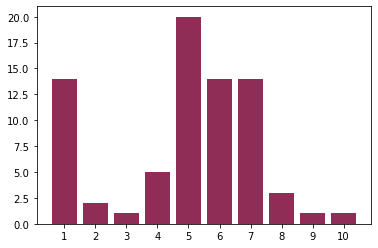

In [31]:
sp, cnt = list(zip(*list(Counter([x[-1] for x in alt_coding_shortest_paths]).items())))
plt.bar(sp, cnt, color='#8F2D56')
plt.xticks(sp)
plt.savefig('bioplex_figures/alt_coding_sp_bar.svg')
plt.show()